In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import sys
#sys.executable #sys.version_info
sys.version
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


In [ ]:
import sys
import matplotlib

print('python:',sys.version)
print('Numpy:',np.__version__)
print('Pandas:',pd.__version__)
print('Scikitlearn:',sklearn.__version__)
print('Seaborn: ',sns.__version__)
print('matplotlib:',matplotlib.__version__)


In [ ]:
Boston=pd.read_csv('housing.data',delim_whitespace=True, header=None)
Boston


<table style="width:60%">
<tr>
<th> Code :   </th>
<th> Description : </th>
</tr>

<tr>
<th> CRIM </th> 
<th> per capita crime rate per town  </th>
</tr>
<tr>
<th> ZN </th>
<th> proportion of residential land zones for lots over 25000 sgr ft ></th>
</tr>
<tr>
<th> INDUS </th>
<th> proportion of non retail business acr per town </th>
</tr>
<tr>
<th> CHAS</th>
<th> Charles River dummy variable (=1 if tract bounds river) </th>
</tr>
<tr>
<th> NOX </th>
<th> NO concentration (pp 10 million) </th>
</tr>
<tr>
<th> RM </th>
<th> Average N rooms  </th>
</tr>
<tr>
<th>  AGE  </th>
<th> proportion of owner occupied builts prior 1940 </th>
</tr>
<tr>
<th>  DIS  </th>
<th> weighted distances to 5 Boston employment centers </th>
</tr>

<tr>
<th>  RAD  </th>
<th> index of accessibility to radial highways </th>
</tr>
    
<tr>
<th>  TAX  </th>
<th> full value property tax rate per 10 000 $ </th>
</tr>
    
<tr>
<th>  PTRATIO </th>
<th> pupil teacher ratio by town </th>
</tr>
    
<tr>
<th> B </th>
<th> 1000(BK-0.63)² ; bk proportion of blacks by town </th>
</tr>
    
<tr>
<th> LSTAT </th>
<th> % lower status of the population </th>
</tr>
    
<tr>
<th>  MEDV  </th>
<th> median value of owner occupied homes in 1000 $ </th>
</tr>
</table>


In [ ]:
Boston.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
                'PTRATIO','B','LSTAT','MEDV']
#Boston.to_csv('Boston.csv')
Boston.describe()


# Exploratory data Analysis (EDA) #

In [ ]:
sns.pairplot(Boston, height=1.5)
plt.show()


In [ ]:
Features=['CRIM','ZN','INDUS','NOX','RM']
sns.pairplot(Boston[Features], height=2.5)
plt.show()


In [ ]:
Features2=['AGE','TAX','PTRATIO','B','LSTAT','MEDV']
sns.pairplot(Boston[Features2], height=2.5)
plt.show()


# Correlation & Features selection #

In [ ]:
pd.options.display.float_format='{:,.3f}'.format
Boston.corr()


In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(Boston.corr(), annot=True)
plt.show()


In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(Boston[['CRIM','ZN','INDUS','CHAS','MEDV']].corr(), annot=True)
plt.show()


# Linear regression with Scikit-Learn #

## Five steps of in using Scikit-earn estimator API by Jacob T. Vanderplas: ##
<ol>
<li> Choose class model by importing the appropriate estimator class from Scikit-earn </li>
<li> Choose model hyperparameters by instanciating this class with desired values
<li> Arrange data into a features matrix and target vector
<li> Fit the model to ur data by calling the fit() method of the model instance
<li> Apply the model to the new data:
<ul>
<li> for supervised learning: often we predict labels for unknown data using predict() method
<li> for unsupervised learning: often we transform or infer properties of the data using the transform() or predict() method
</ul>
</ol>

### MEDV vs RM Linear regression ###

In [ ]:
from sklearn.linear_model import LinearRegression
X=Boston['RM'].values.reshape(-1,1)
Y=Boston['MEDV'].values


In [ ]:
model=LinearRegression()
model.fit(X,Y)
print(f'linear model coeficient={model.coef_} and B={model.intercept_}')


In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=X,y=Y,color='orange')
plt.xlabel('Average N of rooms')
plt.ylabel('owner occupied houses mediane value 1000$')
plt.show()


In [ ]:
sns.jointplot(x='RM', y='MEDV', data=Boston, kind='reg',height=10,color='orange')
plt.grid()
plt.show()


In [ ]:

model.predict(np.array([5]).reshape(1,-1))


### LSTAT vs MEDV Linear regression ###

In [ ]:

X2=Boston['LSTAT'].values.reshape(-1,1)
Y2=Boston['MEDV'].values
model2=LinearRegression()
model2.fit(X2,Y2)
print(f'linear, a={model2.coef_} and b={model2.intercept_}')


In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=X2,y=Y2,color='DeepSkyBlue');
plt.xlabel('Median value of owner occupied homes in 1000 $')
plt.ylabel('% lower status of the population')
plt.grid()
plt.show();


In [ ]:
#optional
sns.jointplot(x='LSTAT', y='MEDV', data=Boston, kind='reg',height=10,color='lime')
plt.grid()
plt.show()


In [ ]:
model2.predict(np.array([15]).reshape(1,-1))


# Robust Regression #

## Random Sample Consensus (RANSAC) ##
<ol>
<li> select <strong> min_samples </strong>random samples from original data and check whether the dataset is valid <strong>(is_data_valid)</strong> </li>
<li> fit a model to a random subset <strong>(base_estimator.fit)</strong> and check whether the estimated model is valid <strong> (is_model_valid)</strong> </li>
<li> Classify all data as inliers or ouliers by calculating the residuals to the estimated model <strong>(base_estimator.predict(x)-y)</strong> all data samples
with absolute residuals smaller than the <strong>residual_threshold </strong>are considered as inliers </li>
<li> save fitted model as best model if number of outliers samples is maximal, in case the current estimated model has the same number of inliers,
    it is considered as the best model if it has better score</li>
</ol>

In [ ]:
from sklearn import linear_model
from sklearn import datasets
#RM vs MEDV
#X=Boston['RM'].values.reshape(-1,1)
#Y=Boston['MEDV'].values
coef=True
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X,Y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Compare estimated coefficients
print(f'Estimated coefficients (coef:{coef} , linear regression: {model.coef_},RANSAC= {ransac.estimator_.coef_}x+{ransac.estimator_.intercept_})')


In [ ]:
#predictions and plotting
line_x=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_x.reshape(-1,1))
line_y=model.predict(line_x.reshape(-1,1))

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], Y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], Y[outlier_mask], c='violet', marker='s', label='Outliers')
plt.plot(line_x, line_y, color='grey',linewidth=2, label="Linear regressor")
plt.plot(line_x,line_y_ransac,color="red", linewidth=2,label="RANSAC regressor")
plt.xlabel('Average N rooms')
plt.ylabel('median value of owner occupied homes in 1000 $ ')
plt.legend(loc='lower right')
plt.show()


**linear regression Assumptions:** https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

# Evaluate Regression Model Performance #

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=Boston.iloc[:, :-1].values
Y=Boston['MEDV'].values

x_train, x_test,y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)


### Method1: Residual Analysis ###

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='s', label='Training')
plt.scatter(y_test_pred,y_test_pred-y_test, c='orange', marker='o', label='Test')
plt.xlabel('Predicted values')
plt.ylabel('Residuals ')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10,50])
plt.show()


### Method2: Mean Squarred Error (MSE) ###
<ul>
<li>The average value of the sums of the squarred error cost function </li>
<li>Useful for comparing different regression models </li>
<li>For tuning parameters via a grid search and cross-validation </li>
</ul>

## $$MSE={{1}\over{n }}{\sum_{i=1}^n{(yi-ŷi)²}}$$ ##

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train,y_train_pred)
mean_squared_error(y_test,y_test_pred)


### Method3: Coefficient of determination R² ###
### $$ R²=1-{SSE \over SST}$$ ###
<ul>
<li>SSE: Sum of squarred errors </li>
<li>SST: Total sum of squares </li>

</ul>


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)
r2_score(y_test,y_test_pred)


# The perfect model #

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

generate_random=np.random.RandomState(0)
x=10*generate_random.rand(1000)
y=3*x+np.random.randn(1000)
plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='^', c='indigo')
plt.show()


In [ ]:
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
y_train_pred=model.predict(x_train.reshape(-1,1))
y_test_pred=model.predict(x_test.reshape(-1,1))


In [ ]:
#Residual Analysis

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='s', label='Training')
plt.scatter(y_test_pred,y_test_pred-y_test, c='orange', marker='o', label='Test')
plt.xlabel('Predicted values')
plt.ylabel('Residuals ')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=3, xmax=33, lw=2, color='r')
plt.xlim([-5,35])
plt.ylim([-25,15])
plt.show()


In [ ]:
#MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(y_train,y_train_pred)
mean_squared_error(y_test,y_test_pred)
print(f'MSE train:{mean_squared_error(y_train,y_train_pred)} , MSE Test:{mean_squared_error(y_test,y_test_pred)}')


In [ ]:
#R²
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)
r2_score(y_test,y_test_pred)
print(f'R² train:{mean_squared_error(y_train,y_train_pred)} , R² Test:{mean_squared_error(y_test,y_test_pred)}')


# Multiple Regression #

## y=$\beta$0+$\beta1$*x1+$\beta2$*x2... ##
 

In [ ]:

Housing=pd.read_csv('housing.data',delim_whitespace=True, header=None)
Housing.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
                'PTRATIO','B','LSTAT','MEDV']
Boston=Housing.iloc[:,0:13]

X=Boston
Y=Housing.iloc[:,13:15]
print(f'x= \n {X} and y=\n {Y}')


# Statsmodels #

In [ ]:
import statsmodels.api as sm

X_constant=sm.add_constant(X)
pd.DataFrame(X_constant)
#sm.OLS?
model=sm.OLS(Y,X_constant)
lr=model.fit()
lr.summary()
#P must be <0.025


## Summary: ##
<ul>
<li> <b>coefficient:</b> it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. </li>
<li><b>std error:</b> is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.</li>
<li><b>P>|t|</b> is one of the most important statistics in the summary. It uses the t statistic to produce the p-value, a measurement of how likely your coefficient is measured through our model by chance. The p-value of 0.378 for Wealth is saying there is a 37.8% chance the Wealth variable has no affect on the dependent variable, Lottery, and our results are produced by chance. A common alpha is 0.05, which few of our variables pass in this instance.</li>
<li><b>[0.025 and 0.975]</b> are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.</li> </ul>
The p-value is the smallest test size that would cause an observation of t=0.1 to lead to a rejection of the null hypothesis

### Residual Tests: ###
<ul>
<li><b>Omnibus:</b> a combined statistic test for skewness and kurtosis</li>
<li><b>prob(Omnibus):</b> P-value of Omnibus test</li>
<li><b>Skewness:</b> a measure of symmetry of residuals around the mean.Zero if symmetrical. A positive value indicates a long tail to the right, a negative value indicates a long tail to the left</li>
<li><b>Kurtosis:</b> A measure of the shape of distribution of the residuals, A normal distribution has 0 measure.A negative value points to a flatter than normal distribution, a positive one has a higher peak than normal distribution</li>
<li><b>Durbin-Watson:</b> A test for presence of correlation among the residuals, this is important for time series modelling</li>
<li><b>Jarque-Bera:</b> it is a combined statistical test of Skewness and Kurtosis</li>
<li><b>Prob(JB): </b>p_value of Jarque-Bera</li>
<li><b>Cond.No: </b>it is a test for multicolinearity. > 30 indicates unstable results.</li>
    
</ul>


In [ ]:
import statsmodels.formula.api as smf

form_lr=smf.ols(formula='Y ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=Housing)
mlr=form_lr.fit()
mlr.summary()


In [ ]:
#predicting 100 rows in basis of CRIM and Black
model_ex=smf.ols(formula='Y ~ CRIM+B',data=Housing) #CRIM+ZN+CHAS+
mlr_ex=model_ex.fit()
mlr_ex.summary()
#predictions = mlr_ex.predict(Housing[0:100])
#predictions.describe()


# Correlation Matrix #

In [ ]:

Housing=pd.read_csv('housing.data',delim_whitespace=True, header=None)
Housing.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
                'PTRATIO','B','LSTAT','MEDV']
Boston=Housing.iloc[:,0:13]
X=Boston
Y=Housing.iloc[:,13:15]


In [ ]:
pd.options.display.float_format='{:,.2f}'.format
corr_matrix=Boston.corr()
corr_matrix


In [ ]:
corr_matrix[np.abs(corr_matrix)< 0.6]=0 #lesser than 0.6 and greater than -0.6
corr_matrix

In [ ]:
palette = sns.color_palette('tab20b',10) # Default color palette
sns.palplot(palette) # Plotting your palette!
#sns.palplot(sns.color_palette('husl', 20)) # Seaborn color palette, with number of colors 
#sns.color_palette('rocket', as_cmap=True) # Get a CMap

plt.figure(figsize=(18,9))
sns.heatmap(corr_matrix, annot=True, cmap=palette)
plt.show()


# Detecting colinearity with Eigenvectors #

In [ ]:
eigenvalues , eigenvectors= np.linalg.eig(Boston.corr())
pd.Series(eigenvalues).sort_values()
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)
print(Boston.columns[2],Boston.columns[8],Boston.columns[9])


small values= presence of colinearity

# Revising Feature importance and Extractions #

In [ ]:
plt.hist(Boston['TAX'])
#plt.hist(Boston['NOX'])


# Standardise variable to identify Key Features #

In [ ]:
from sklearn.linear_model import LinearRegression
pd.options.display.float_format='{:,.4f}'.format

model=LinearRegression()
model.fit(X,Y)
mc=list(np.transpose(model.coef_))
bc=list((Boston.columns))
bcc=np.transpose(bc)
result=pd.DataFrame({'Name':bc,'Coefficient':mc}).set_index('Name')
co=np.abs(result).sort_values(by=['Coefficient'], ascending=False)
co


### 2nd method ###

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
standard_coefficient_linear_reg=make_pipeline(scaler,model)
standard_coefficient_linear_reg.fit(X,Y)
scl=list(np.transpose(standard_coefficient_linear_reg.steps[1][1].coef_))
result=pd.DataFrame({'Name':bcc,'Coefficient':scl}).set_index('Name')
co=np.abs(result).sort_values(by=['Coefficient'], ascending=False)
co


## Use R² to identify key features ##
<ul>
<li>Compare R² of the model with R² without a feature</li>
<li>significant change in R² means the importance of the feature</li>
</ul>

In [ ]:
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

linear_reg=smf.ols(formula='Y ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=Boston)
Benchmark=linear_reg.fit()
r2_score(Y,Benchmark.predict(Boston))


## Without LSTAT ##

In [ ]:
linear_reg=smf.ols(formula='Y ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B',data=Boston)
lr_lstat=linear_reg.fit()
r2_score(Y,lr_lstat.predict(Boston))


## Without AGE ##

In [ ]:
linear_reg=smf.ols(formula='Y ~ CRIM+ZN+INDUS+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=Boston)
lr_AGE=linear_reg.fit()
r2_score(Y,lr_AGE.predict(Boston))


# Regularized Regression #
<ul>
<li>Ridge regression </li>
<li>Least absolute shrinkage and selection operator(LASSO) </li>
<li>Elastic net </li>
</ul>

## Ridge Regression ##

<p>Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. 
This method performs <b>L2</b> regularization. When the issue of multicollinearity occurs, least-squares are unbiased, 
and variances are large, this results in predicted values being far away from the actual values. 

The cost function for ridge regression: </p>

## $$ Min(||X( \omega)-Y||_2^2 + \lambda||\omega||_2^2) $$ ##

<p>Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.
<ul>
<li>   It shrinks the parameters. Therefore, it is used to prevent multicollinearity </li> 
<li>    It reduces the model complexity by coefficient shrinkage </li> 
<li> Check out the free course on regression analysis. </li> 
</ul>
<b>Ridge Regression Models </b> 

For any type of regression machine learning model, the usual regression equation forms the base which is written as: </p>

<div>
$$ Y = X\beta+e $$
    </div>
<p>
Where Y is the dependent variable, X represents the independent variables, B is the regression coefficients to be estimated, and e represents the errors are residuals. 
Once we add the lambda function to this equation, the variance that is not evaluated by the general model is considered. After the data is ready and identified to be part of L2 regularization, there are steps that one can undertake.</p>
<b>Standardization </b>
<p>
In ridge regression, the first step is to standardize the variables (both dependent and independent) by subtracting their means and dividing by their standard deviations. This causes a challenge in notation since we must somehow indicate whether the variables in a particular formula are standardized or not. As far as standardization is concerned, all ridge regression calculations are based on standardized variables. When the final regression coefficients are displayed, they are adjusted back into their original scale. However, the ridge trace is on a standardized scale.

Also Read: Support Vector Regression in Machine Learning </p>
<b>Bias and variance trade-off</b>

Bias and variance trade-off is generally complicated when it comes to building ridge regression models on an actual dataset. However, following the general trend which one needs to remember is:

    The bias increases as λ increases.
    The variance decreases as λ increases.

<b>Assumptions of Ridge Regressions</b>

The assumptions of ridge regression are the same as that of linear regression: linearity, constant variance, and independence. However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.
Now, let’s take an example of a linear regression problem and see how ridge regression if implemented, helps us to reduce the error.

We shall consider a data set on Food restaurants trying to find the best combination of food items to improve their sales in a particular region. 
<p>
if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.</p>

## LASSO ##

<p>Is a linear model that estimates sparse coefficients. Called L1 regularization.
Mathematically, it consists in a linear model trained with $\phi1$ prior as regularized.The objective function to minimize is:</p>

## $$ Min_\omega \frac{1}{2n_{samples}}||X( \omega)-Y||_2^2 + \lambda||\omega||_1 $$ ##
<p> The LASSO estimate thus solves of least squares penalty with $\lambda||\omega||_1$ added, where $\lambda$ is constant and $||\omega||_1$ is the $\phi1$ -norm of the parameter vector.</p>
<p>
The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.</p>


## ELASTIC Net ##

<p>A linear regression model trained with L1 and L2 prior as regularizer.
This combination allows for learning a sparse model where few of the weights are non 0 like LASSO, while still maintaining the regularization properties of ridge.
<b>ELASTIC NET</b> is useful when there are multiple features which are correlated with one another.<b>LASSO</b> is likely to pick one of these randomly, while <b>ELASTIC NET</b> is likely to pick both.
A practical advantage of trading-off between LASSO and Ridge is it allows <b>ELASTIC NET</b> to inherit some of Ridge's stability under rotation.
the objective function to minimize is in this case:
</p>

## $$ Min_\omega \frac{1}{2n_{samples}}||X( \omega)-Y||_2^2 + \lambda p||\omega||_1 + \frac{\lambda(1-p)}{2} ||\omega||_2^2$$ ##


# Outliers Impact #

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


## Linear regression ##

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n_samples=100
rng=np.random.randn(n_samples)*10
y_gen=0.5*rng+2*np.random.randn(n_samples)
lr=LinearRegression()
model=lr.fit(rng.reshape(-1,1), y_gen)
model_pred=lr.predict(rng.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='b')
plt.plot(rng,model_pred, color='r' )
print(lr.coef_)


In [ ]:
idx=rng.argmax()
y_gen[idx]=200
idx=rng.argmin()
y_gen[idx]=-200
plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='green')
o_lr=LinearRegression()
o_lr.fit(rng.reshape(-1,1), y_gen)
o_model_predict=o_lr.predict(rng.reshape(-1,1))
plt.scatter(rng, y_gen, color='grey')
plt.plot(rng,o_model_predict, color='indigo' )
print(o_lr.coef_)


## Ridge Regression ##

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import preprocessing

#rng_N=preprocessing.normalize(rng.reshape(-1,1))
ridge_mod=Ridge(alpha=0.5, fit_intercept=True)#, normalize=True)
ridge_mod.fit(rng.reshape(-1,1), y_gen)
ridge_mod_pred=ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='red')
plt.plot(rng,ridge_mod_pred, color='blue' )
ridge_mod.coef_


In [ ]:
#Ridge + normalize data ???
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

ridge_modN = make_pipeline(StandardScaler(with_mean=False),RidgeCV())
ridge_modN.fit(rng.reshape(-1,1), y_gen)
ridge_modN_pred=ridge_modN.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='red')
plt.plot(rng,ridge_modN_pred, color='blue' )

ridge_modN['ridgecv'].coef_


## LASSO ##

In [ ]:
from sklearn.linear_model import Lasso

Lasso_mod=Lasso(alpha=0.5, fit_intercept=True)#, normalize=True)
Lasso_mod.fit(rng.reshape(-1,1), y_gen)
Lasso_mod_pred=Lasso_mod.predict(rng.reshape(-1,1),)

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='green')
plt.plot(rng,Lasso_mod_pred, color='blue' )
Lasso_mod.coef_


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso = Lasso(alpha=0.1)

lasso_pipeline = pipeline(steps=[('preprocess', Lasso_mod),('model', Lasso)])

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='red')
plt.plot(rng,Lasso_modN_prod, color='blue' )

Lasso_modN['model'].coef_


## Elastic Net regression ##

In [ ]:
from sklearn.linear_model import ElasticNet

en_model=ElasticNet(alpha=0.5, fit_intercept=True)#, normalize=True)
en_model.fit(rng.reshape(-1,1), y_gen)
en_model_pred=en_model.predict(rng.reshape(-1,1),)

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen, color='orange')
plt.plot(rng,en_model_pred, color='blue' )
en_model.coef_


### When to use Ridge, Lasso or Elasticnet? ###
<ul>
<li><b>Ridge Regression</b> can't zero out coefficient, you either end up including all the coefficients in the model, or none of them.</li>
<li><b>LASSO</b> does both parameters shrinkage and variable selection automatically.</li>
<li>if some of your covariates are highly correlated, you may want to look at the <b>ElasticNet</b> instead of <b>LASSO</b>.</li>
</ul>

# Polynomial Regression #

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import sys
import matplotlib

print('python:',sys.version)
print('Numpy:',np.__version__)
print('Pandas:',pd.__version__)
print('Scikitlearn:',sklearn.__version__)
print('Seaborn: ',sns.__version__)
print('matplotlib:',matplotlib.__version__)


## $$ y= x^3+100+\epsilon $$ ##

In [ ]:
np.random.seed(42)
n_samples=100
X=np.linspace(0,10,100)
rng=np.random.randn(n_samples)*100
Y=X**3+100+rng
plt.figure(figsize=(10,8))
plt.scatter(X,Y,c='#7f7f7f' )
plt.grid()
plt.show()


### Linear Regression ###

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(X.reshape(-1,1),Y)
lr_pred=lr.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(X,Y,c='#139fe8' )
plt.plot(X,lr_pred, c='#8a010d' )
plt.grid()
plt.show()
print(f'model Coef={lr.coef_}, R² ={r2_score(Y,lr_pred)}')


### Polynomial Regression ###

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X.reshape(-1,1))
lr2=LinearRegression()
lr2.fit(X_poly,Y.reshape(-1,1))
Y_pred=lr2.predict(X_poly)

plt.figure(figsize=(10,8))
plt.scatter(X,Y,c='#14047b' )
plt.plot(X,Y_pred, c='red' )
plt.grid()
plt.show()
print(f'model Coef={lr2.coef_}, R² ={r2_score(Y,Y_pred)}')


### Example: Boston dataset ###

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

Boston=pd.read_csv('housing.data',delim_whitespace=True, header=None)
Boston.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
                'PTRATIO','B','LSTAT','MEDV']

pd.options.display.float_format='{:,.3f}'.format
sns.pairplot(Boston, size=1.5)
Boston.corr()


In [ ]:
X_boston=np.array(Boston['DIS'])
Y_boston=np.array(Boston['NOX'])
plt.figure(figsize=(12,6))
plt.scatter(X_boston,Y_boston)
plt.grid()
plt.show()


### linear Regression ###

In [ ]:
lin=LinearRegression()
lin.fit(X_boston.reshape(-1,1),Y_boston)
lin_pred=lin.predict(X_boston.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(X_boston,Y_boston,c='darkslateblue' )
plt.plot(X_boston,lin_pred, c='fuchsia' )
plt.grid()
plt.show()
print(f'model Coef={lin.coef_}, R² ={r2_score(Y_boston,lin_pred):.3f}')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_boston.reshape(-1,1))
poly2=LinearRegression()
poly2.fit(X_poly,Y_boston.reshape(-1,1))
X_fit=np.arange(X_boston.min(), X_boston.max(),1)[:,np.newaxis]
Y_pred=poly2.predict(poly.fit_transform(X_fit.reshape(-1,1)))

plt.figure(figsize=(12,6))
plt.scatter(X_boston,Y_boston, c='forestgreen')
plt.plot(X_fit,Y_pred,c='lightsalmon', linewidth=3)
plt.grid()
plt.show()
print(f'model Coef={poly2.coef_}, R² ={r2_score(Y_boston,poly2.predict(X_poly)):.3f}')


### Cubic Regression ###

In [ ]:
poly_3=PolynomialFeatures(degree=3)
X_poly=poly_3.fit_transform(X_boston.reshape(-1,1))
poly3=LinearRegression()
poly3.fit(X_poly,Y_boston.reshape(-1,1))
X_fit=np.arange(X_boston.min(), X_boston.max(),1)[:,np.newaxis]
Y_pred3=poly3.predict(poly_3.fit_transform(X_fit.reshape(-1,1)))

plt.figure(figsize=(12,6))
plt.scatter(X_boston,Y_boston, c='forestgreen')
plt.plot(X_fit,Y_pred3,c='lightsalmon', linewidth=3)
plt.grid()
plt.show()
print(f'model Coef={poly3.coef_}, R² ={r2_score(Y_boston,poly3.predict(X_poly)):.3f}')


# Non linear relationships #

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [2]:

Data=pd.read_csv('housing.data',delim_whitespace=True, header=None)
Boston=pd.DataFrame(data=np.array(Data),index=None, columns=('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
                'PTRATIO','B','LSTAT','MEDV'), )#.iloc[:,:-1]

#sns.pairplot(Boston, height=1.5)
#plt.savefig('CorrMatrix.png')
#pd.options.display.float_format='{:,.3f}'.format
#Boston.corr()
Boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Text(0, 0.5, 'MEDV')

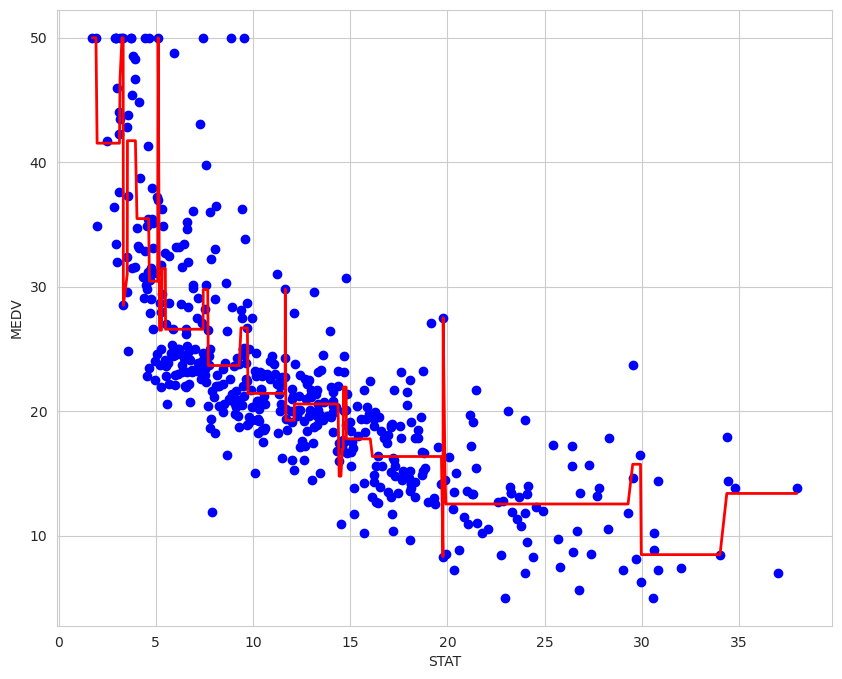

In [3]:
from sklearn.tree import DecisionTreeRegressor

Y=Boston['MEDV']
X=Boston['LSTAT'].values
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(X.reshape(-1,1),Y) 
sort_idx=X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],Y[sort_idx], c='b')
plt.plot(X[sort_idx],tree.predict(X[sort_idx].reshape(-1,1)), color='r', linewidth=2)
plt.xlabel('STAT')
plt.ylabel('MEDV')


## Random Forest ##

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor


In [17]:
X=Boston
Y=Boston['MEDV']
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7, random_state=42) 
#Criterion: 'poisson', 'squared_error', 'friedman_mse', 'absolute_error'
forest=RandomForestRegressor(n_estimators=500, criterion='friedman_mse', random_state=42, n_jobs=-1)
forest.fit(X_train, Y_train)
Y_train_pred=forest.predict(X_train)
Y_test_pred=forest.predict(X_test)
print(f'MSE Train={mean_squared_error(Y_train,Y_train_pred):.4f} , MSE Test={mean_squared_error(Y_test,Y_test_pred):.4f}')
print(f'R² Train={r2_score(Y_train,Y_train_pred):.4f} , R² Test={r2_score(Y_test,Y_test_pred):.4f}')


MSE Train=0.0087 , MSE Test=0.0238
R² Train=0.9999 , R² Test=0.9997


## AdaBoost ##

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)
ada.fit(X_train,Y_train)
Y_train_predict=ada.predict(X_train)
Y_test_predict=ada.predict(X_test)
print(f'MSE Train={mean_squared_error(Y_train,Y_train_pred):.4f} , MSE Test={mean_squared_error(Y_test,Y_test_pred):.4f}')
print(f'R² Train={r2_score(Y_train,Y_train_pred):.4f} , R² Test={r2_score(Y_test,Y_test_pred):.4f}')


MSE Train=0.0087 , MSE Test=0.0238
R² Train=0.9999 , R² Test=0.9997


### Feature importance ###

<Axes: >

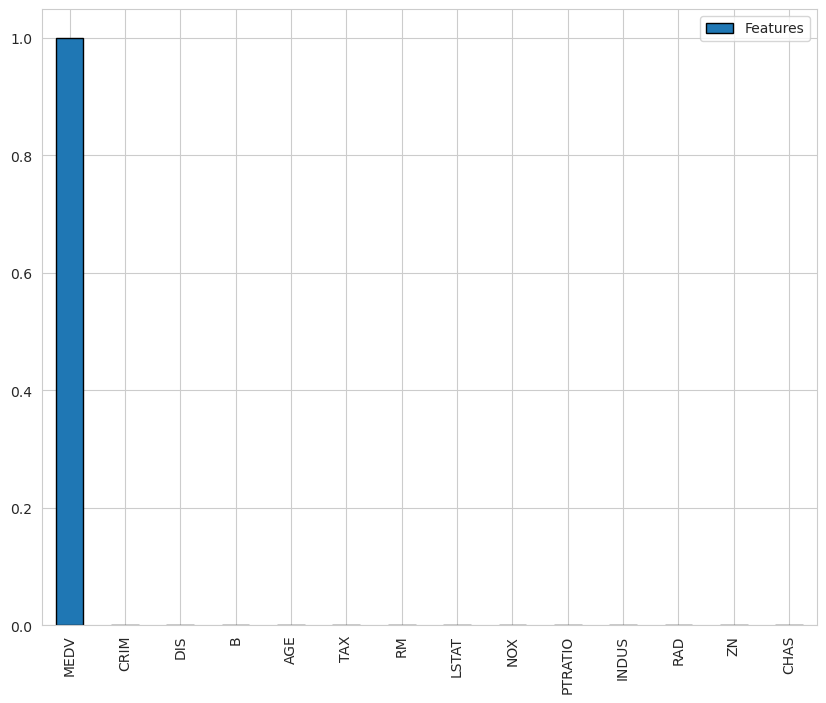

In [19]:
# Random Forest
forest.feature_importances_
result= pd.DataFrame(forest.feature_importances_, Boston.columns)
result.columns=['Features']
rt=result.sort_values(by='Features', ascending=False)
rt.plot(kind='bar', figsize=(10,8), edgecolor='black')


<Axes: >

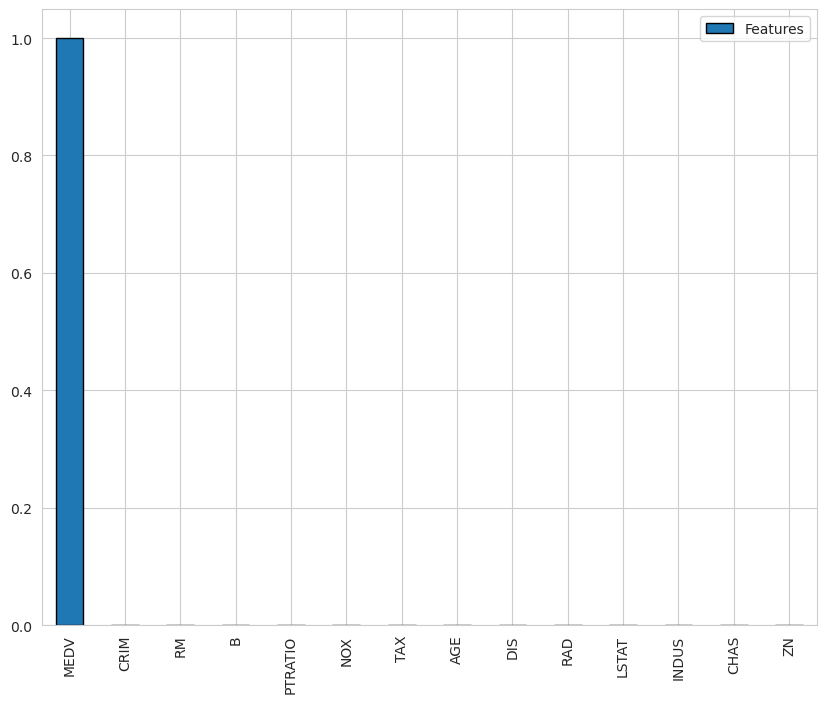

In [20]:
# Ada
ada.feature_importances_
result= pd.DataFrame(ada.feature_importances_, Boston.columns)
result.columns=['Features']
rt=result.sort_values(by='Features', ascending=False)
rt.plot(kind='bar', figsize=(10,8), edgecolor='black')


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

X=Boston
Y=Boston['MEDV']
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=42) 
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(X.reshape(-1,1),Y) 
sort_idx=X.flatten().argsort()

Y_train_pred=tree.predict(X_train)
Y_test_pred=tree.predict(X_test)
print(f'MSE Train={mean_squared_error(Y_train,Y_train_pred):.4f} , MSE Test={mean_squared_error(Y_test,Y_test_pred):.4f}')
print(f'R² Train={r2_score(Y_train,Y_train_pred):.4f} , R² Test={r2_score(Y_test,Y_test_pred):.4f}')